In [3]:
import pandas as pd
import glob
import os

# Define the base directory where year folders are located
base_dir = 'Gasoline'  # Change this to the actual path where the folders are stored

dfs = []

# Loop through each year folder from 2010 to 2024
for year in range(2010, 2026):
    year_folder = os.path.join(base_dir, str(year))
    if os.path.exists(year_folder):
        for file_name in ['1.csv', '2.csv', '3.csv', '4.csv']:
            file_path = os.path.join(year_folder, file_name)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, usecols=['Time', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Volume'])  # Read only the required columns
                dfs.append(df.dropna())  # Drop any empty rows

# Concatenate all dataframes
if dfs:
    merged_data = pd.concat(dfs, ignore_index=True)
    # Save to all.csv without extra blank lines
    merged_data.to_csv('all_Gasoline.csv', index=False)
    print("all.csv has been created successfully!")
else:
    print("No files found in the given year range.")


all.csv has been created successfully!


In [6]:
#This part only for WTI data with irregular datetime

import pandas as pd
from datetime import datetime

# Load the CSV file
df = pd.read_csv('all_Gasoline.csv')

# Function to standardize the date format
def standardize_time_format(time_string):
    try:
        # Try to parse the time in the '%Y-%m-%d %H:%M' format
        return datetime.strptime(time_string, '%Y-%m-%d %H:%M').strftime('%d/%m/%Y %H:%M')
    except ValueError:
        # If it fails, try to parse it in the '%d/%m/%Y %H:%M' format
        return datetime.strptime(time_string, '%d/%m/%Y %H:%M').strftime('%d/%m/%Y %H:%M')

# Apply the function to the 'Time' column
df['Time'] = df['Time'].apply(standardize_time_format)

# Save the updated dataframe back to CSV
df.to_csv('all_Gasoline_standardized.csv', index=False)

print("Time column standardized and saved to 'all_WTI_standardized.csv'")


Time column standardized and saved to 'all_WTI_standardized.csv'


In [ ]:
#For WTI, but this part doest slove the issue on Datetime

import pandas as pd
import glob
import os

# Define the base directory where year folders are located
base_dir = 'WTI'  # Change this to the actual path where the folders are stored

dfs = []

# Loop through each year folder from 2010 to 2024
for year in range(2010, 2025):
    year_folder = os.path.join(base_dir, str(year))
    if os.path.exists(year_folder):
        for file_name in ['1.csv', '2.csv', '3.csv', '4.csv']:
            file_path = os.path.join(year_folder, file_name)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, usecols=['Time', 'Last'])  # Read only the required columns
                dfs.append(df.dropna())  # Drop any empty rows

# Concatenate all dataframes
if dfs:
    merged_data = pd.concat(dfs, ignore_index=True)
    
    # Convert the 'Time' column to datetime, letting pandas infer the format
    merged_data['Time'] = pd.to_datetime(merged_data['Time'], errors='coerce', dayfirst=True)
    
    # Reformat the 'Time' column to the desired format
    merged_data['Time'] = merged_data['Time'].dt.strftime('%d/%m/%Y %H:%M')
    
    # Save to all.csv without extra blank lines
    merged_data.to_csv('all_WTI.csv', index=False)
    print("all_WTI.csv has been created successfully!")
else:
    print("No files found in the given year range.")


In [7]:
# Load and display first and last 10 rows
all_data = pd.read_csv('all_WTI.csv')
print("WTI  ########################################")
print("First 10 rows:")
print(all_data.head(3))
print("\nLast 10 rows:")
print(all_data.tail(3))

# Load and display first and last 10 rows
all_data = pd.read_csv('all_Brent.csv')
print("\nBrent  ########################################")
print("First 10 rows:")
print(all_data.head(3))
print("\nLast 10 rows:")
print(all_data.tail(3))

# Load and display first and last 10 rows
all_data = pd.read_csv('all_Gasoline.csv')
print("\nGasoline  ########################################")
print("First 10 rows:")
print(all_data.head(3))
print("\nLast 10 rows:")
print(all_data.tail(3))

WTI  ########################################
First 10 rows:
             Time   Open   High    Low   Last  Change    %Chg  Volume
0  3/1/2010 17:05  79.87  79.91  79.83  79.84   -0.05  -0.06%   119.0
1  3/1/2010 17:10  79.83  79.88  79.83  79.83   -0.01  -0.01%    27.0
2  3/1/2010 17:15  79.84  79.94  79.83  79.90    0.07   0.09%   111.0

Last 10 rows:
                     Time   Open   High    Low   Last  Change    %Chg  Volume
1077312  2025-02-28 15:45  69.97  69.97  69.91  69.94   -0.02  -0.03%   242.0
1077313  2025-02-28 15:50  69.96  69.97  69.92  69.96    0.02  +0.03%   154.0
1077314  2025-02-28 15:55  69.97  69.99  69.94  69.95   -0.01  -0.01%   156.0

Brent  ########################################
First 10 rows:
              Time   Open   High    Low   Last  Change    %Chg  Volume
0   6/1/2010 10:20  80.91  80.91  80.91  80.91   -0.22  -0.27%     1.0
1   15/1/2010 9:15  77.55  77.55  77.55  77.55   -3.36  -4.15%     1.0
2  15/1/2010 12:40  77.00  77.00  77.00  77.00   -0.55 

In [8]:
import pandas as pd
from datetime import datetime, timedelta

# Define start and end datetime
start_time = datetime.strptime('3/1/2010 17:05', '%d/%m/%Y %H:%M')
end_time = datetime.strptime('28/2/2025 15:55', '%d/%m/%Y %H:%M')

# Generate datetime range with 5-minute increments
date_range = pd.date_range(start=start_time, end=end_time, freq='5T').strftime('%d/%m/%Y %H:%M')

# Create DataFrame
df = pd.DataFrame({'Time': date_range})

# Save to CSV
df.to_csv('ALL_data.csv', index=False)

print("CSV file 'ALL_data.csv' has been created successfully.")

C:\Users\ANAS\AppData\Local\Temp\ipykernel_15680\4194688508.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_time, end=end_time, freq='5T').strftime('%d/%m/%Y %H:%M')


CSV file 'ALL_data.csv' has been created successfully.


In [11]:
import pandas as pd
# Load the data from both CSV files
datetime_data = pd.read_csv('ALL_data.csv')
all_bren_data = pd.read_csv('all_Gasoline_standardized.csv')

# Convert the 'Datetime' columns to datetime objects to standardize the format
datetime_data['Time'] = pd.to_datetime(datetime_data['Time'], format='%d/%m/%Y %H:%M')
all_bren_data['Time'] = pd.to_datetime(all_bren_data['Time'], format='%d/%m/%Y %H:%M')

# Merge the two dataframes on the 'Datetime' column with a left join
merged_data = pd.merge(datetime_data, all_bren_data[['Time', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Volume']], on='Time', how='left')

# Replace NaN values in the 'Last' column with 'NA'
merged_data['Last'] = merged_data['Last'].fillna('NA')

# Save the updated dataframe to a new CSV file (or overwrite the original if desired)
merged_data.to_csv('3_data.csv', index=False)

In [14]:
#   Count number of data part only

WTI_data = pd.read_csv('3_data.csv')

# Count the number of non-NaN values in the 'Last' column
last_count = WTI_data['Last'].count()

# Print the result
print(f"Number of data in the 'Last' column: {last_count}")

Number of data in the 'Last' column: 889992


In [ ]:
# Load the data from both CSV files
datetime_data = pd.read_csv('ALL_data.csv')
all_bren_data = pd.read_csv('all_Brent_standardized.csv')

# Convert the 'Datetime' columns to datetime objects to standardize the format
datetime_data['Time'] = pd.to_datetime(datetime_data['Time'], format='%d/%m/%Y %H:%M')
all_bren_data['Time'] = pd.to_datetime(all_bren_data['Time'], format='%d/%m/%Y %H:%M')

# Merge the two dataframes on the 'Datetime' column with a left join
merged_data = pd.merge(datetime_data, all_bren_data[['Time', 'Last']], on='Time', how='left')

# Replace NaN values in the 'Last' column with 'NA'
merged_data['Last'] = merged_data['Last'].fillna('NA')

# Save the updated dataframe to a new CSV file (or overwrite the original if desired)
merged_data.to_csv('2_data.csv', index=False)

In [ ]:
# Load the data from both CSV files
datetime_data = pd.read_csv('ALL_data.csv')
all_bren_data = pd.read_csv('all_Gasoline.csv')

# Convert the 'Datetime' columns to datetime objects to standardize the format
datetime_data['Time'] = pd.to_datetime(datetime_data['Time'], format='%d/%m/%Y %H:%M')
all_bren_data['Time'] = pd.to_datetime(all_bren_data['Time'], format='%d/%m/%Y %H:%M')

# Merge the two dataframes on the 'Datetime' column with a left join
merged_data = pd.merge(datetime_data, all_bren_data[['Time', 'Last']], on='Time', how='left')

# Replace NaN values in the 'Last' column with 'NA'
merged_data['Last'] = merged_data['Last'].fillna('NA')

# Save the updated dataframe to a new CSV file (or overwrite the original if desired)
merged_data.to_csv('3_data.csv', index=False)

In [15]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('1_data.csv')
df2 = pd.read_csv('2_data.csv')
df3 = pd.read_csv('3_data.csv')

# Merge the dataframes on the 'Time' column
combined_df = pd.merge(df1[['Time', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Volume']], df2[['Time', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Volume']], on='Time', how='outer', suffixes=('_1', '_2'))
combined_df = pd.merge(combined_df, df3[['Time', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Volume']], on='Time', how='outer')

# Rename columns for clarity
combined_df.columns = ['Time', 'Open_WTI', 'High_WTI', 'Low_WTI', 'Last_WTI', 'Change_WTI', '%Chg_WTI', 'Volume_WTI', 'Open_BRENT', 'High_BRENT', 'Low_BRENT', 'Last_BRENT', 'Change_BRENT', '%Chg_BRENT', 'Volume_BRENT', 'Open_GAS', 'High_GAS', 'Low_GAS', 'Last_GAS', 'Change_GAS', '%Chg_GAS', 'Volume_GAS']

# Save the combined dataframe to a new CSV file
combined_df.to_csv('ALL.csv', index=False)

print("CSV files successfully combined into ALL.csv")


CSV files successfully combined into ALL.csv


In [16]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("ALL.csv")

# Drop rows where all three columns are NaN
df_cleaned = df.dropna(subset=['Open_WTI', 'High_WTI', 'Low_WTI', 'Last_WTI', 'Change_WTI', '%Chg_WTI', 'Volume_WTI', 'Open_BRENT', 'High_BRENT', 'Low_BRENT', 'Last_BRENT', 'Change_BRENT', '%Chg_BRENT', 'Volume_BRENT', 'Open_GAS', 'High_GAS', 'Low_GAS', 'Last_GAS', 'Change_GAS', '%Chg_GAS', 'Volume_GAS'], how='all')

# Save the cleaned dataframe back to a new CSV file
df_cleaned.to_csv("ALL_cleaned.csv", index=False)

print("Rows with all three values missing have been removed.")

Rows with all three values missing have been removed.


In [18]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("ALL.csv")

# Forward fill missing values
df.fillna(method='ffill', inplace=True)

# Backward fill missing values (for first row cases)
df.fillna(method='bfill', inplace=True)

# Save the imputed dataframe back to a new CSV file
df.to_csv("ALL_imputed.csv", index=False)

print("Missing values have been imputed using forward and backward fill.")


C:\Users\ANAS\AppData\Local\Temp\ipykernel_15680\2798361547.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\ANAS\AppData\Local\Temp\ipykernel_15680\2798361547.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Missing values have been imputed using forward and backward fill.


<Figure size 1200x600 with 0 Axes>

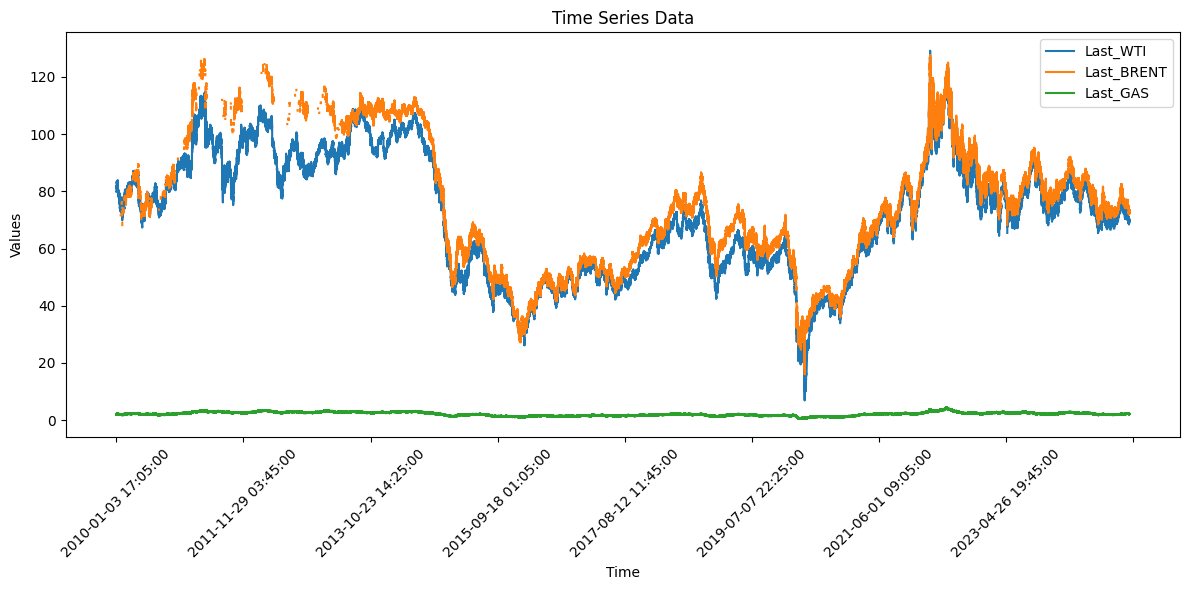

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("ALL.csv")

# Set figure size
plt.figure(figsize=(12, 6))  

# Plot each column on the same graph
ax = df.plot(x='Time', y=['Last_WTI', 'Last_BRENT', 'Last_GAS'], figsize=(12, 6))

# Labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.legend(['Last_WTI', 'Last_BRENT', 'Last_GAS'])

# Adjust x-axis labels
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

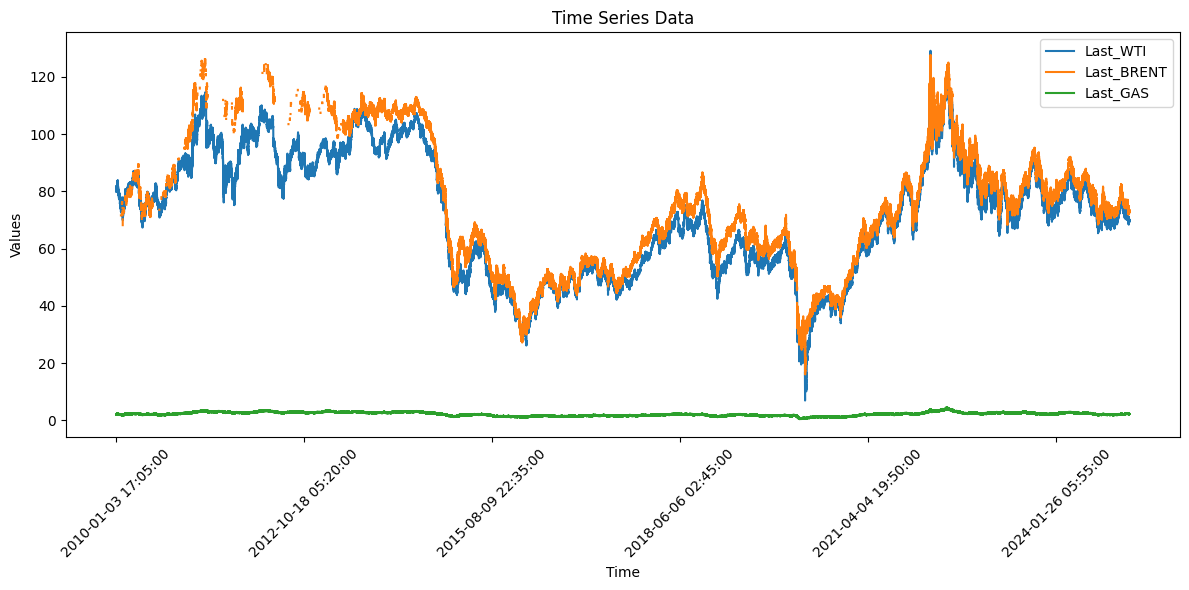

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("ALL_cleaned.csv")

# Set figure size
plt.figure(figsize=(12, 6))  

# Plot each column on the same graph
ax = df.plot(x='Time', y=['Last_WTI', 'Last_BRENT', 'Last_GAS'], figsize=(12, 6))

# Labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.legend(['Last_WTI', 'Last_BRENT', 'Last_GAS'])

# Adjust x-axis labels
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

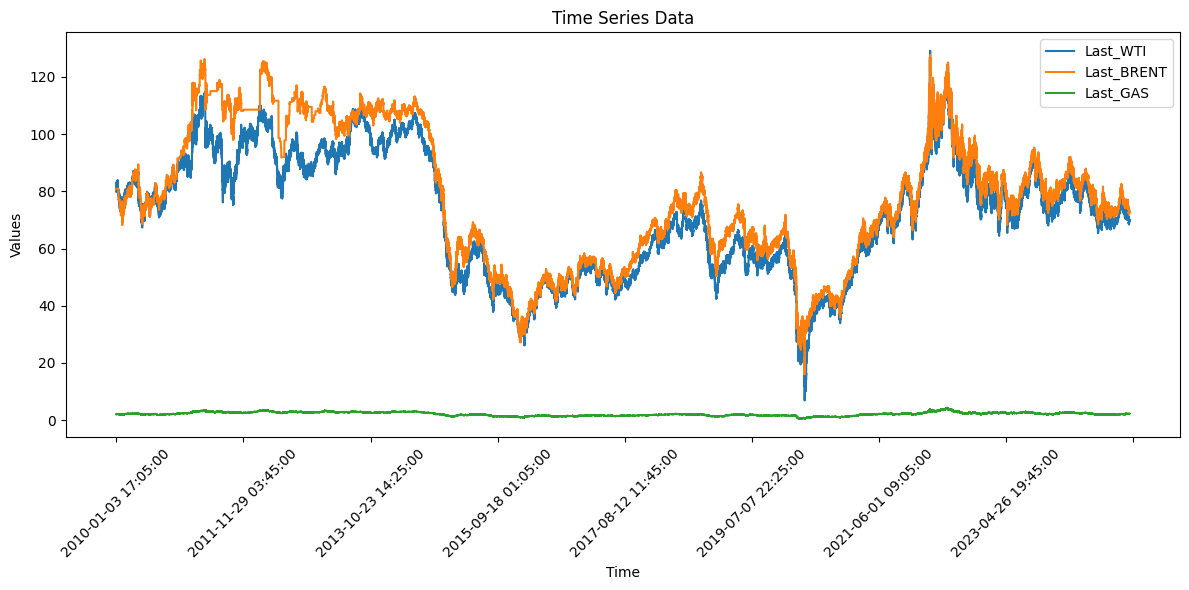

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("ALL_imputed.csv")

# Set figure size
plt.figure(figsize=(12, 6))  

# Plot each column on the same graph
ax = df.plot(x='Time', y=['Last_WTI', 'Last_BRENT', 'Last_GAS'], figsize=(12, 6))

# Labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.legend(['Last_WTI', 'Last_BRENT', 'Last_GAS'])

# Adjust x-axis labels
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

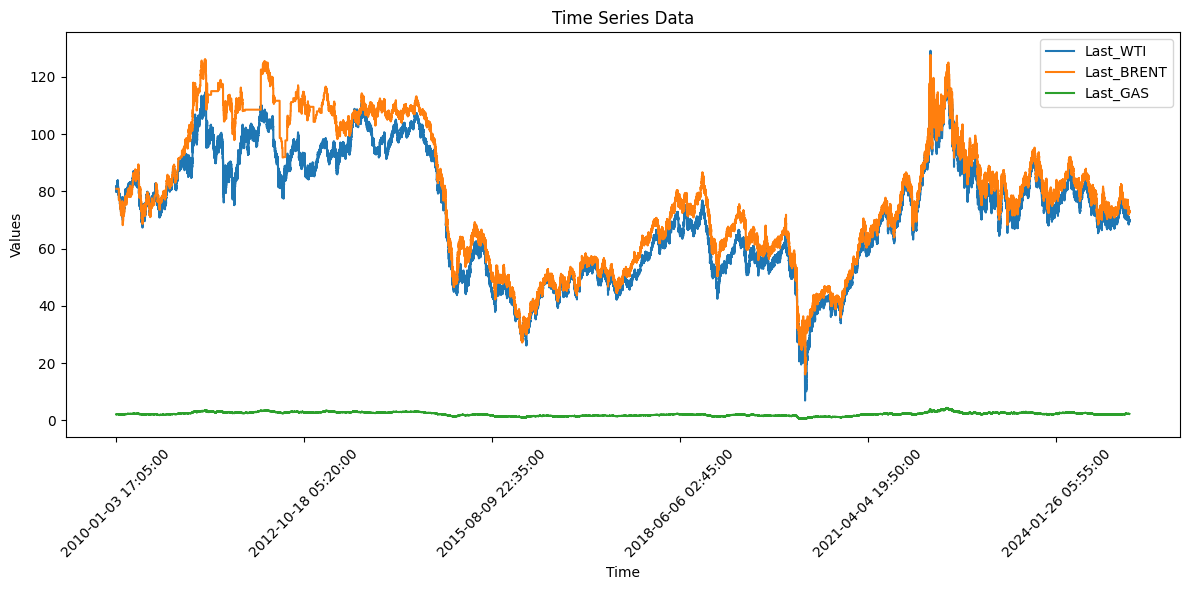

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("ALL_cleaned_imputed.csv")

# Set figure size
plt.figure(figsize=(12, 6))  

# Plot each column on the same graph
ax = df.plot(x='Time', y=['Last_WTI', 'Last_BRENT', 'Last_GAS'], figsize=(12, 6))

# Labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.legend(['Last_WTI', 'Last_BRENT', 'Last_GAS'])

# Adjust x-axis labels
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()